### This code is done for modularizing the code and thus make the code faster.
### Importing necessary libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',  26)

### Importing cleaned data, data.csv and data_est.csv

In [2]:
data = pd.read_csv('data.csv',encoding='utf-8')
data_est = pd.read_csv('data_est.csv',encoding='utf-8')
#data_brand_ratio = pd.read_csv('data_brand_ratio.csv',encoding='utf-8')

In [3]:
data_brand_ratio = data['brand_ratio']
data_est_brand_ratio = data_est['brand_ratio']
data = data.drop('brand_ratio', axis = 1)
data_est = data_est.drop('brand_ratio', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)
data_est = data_est.drop('Unnamed: 0', axis = 1)

### Splitting both datasets into train, validate, and test sets. Performing Forward Feature Selection and PCA to reduce dimensionality. Assigning X and Y vectors

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X_data = data.iloc[:,0:data.shape[1]-1].values
Y_data = data.iloc[:,data.shape[1]-1].values
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data, Y_data, train_size=0.75, random_state = 1)

clf_data = ExtraTreesClassifier()
clf_data = clf_data.fit(X_data_train, Y_data_train)

# We need to do feature reduction at that point.
# SelectFomModel helps do that by taking only the most impactful features.
model_data = SelectFromModel(clf_data, prefit=True)
print(model_data)
X_data_decomp_train_selc = model_data.transform(X_data_train)
X_data_decomp_test_selc = model_data.transform(X_data_test)
indices_data = model_data.get_support(indices = True)

C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        norm_order=1, prefit=True, threshold=None)


<font color='red'>In multivariate data, we often have many dimensions in the dataset which makes visualization hard. Now this means it is difficult for us to analyze all the data parameters. Often the variables co-vary so that there can be a lot of redundent information. Thus knowing one attribute, makes it sufficient to predict the other attribute's value as they are co-variant. <p>Ordination reduces dimentionality to make interpretation of data easier. PCA reduces the multivariate data to a smaller dimension by creating a new co-ordinate system.</p>

<p> 1. PCA finds the direction of maximum variance among the data. </p>
<p> 2. The remaining axes must be orthogonal to the first dimension of highest variance. They are ordered in decreasing order of variance.</p></font>

## Decision Tree

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn import tree
pca_temp_data = decomposition.PCA()
dt = tree.DecisionTreeClassifier()
for n_comps in range(25, 55,10):
    pca_temp_data.n_components = n_comps
    X_data_decomp_train = pca_temp_data.fit_transform(X_data_train)
    scores = cross_val_score(dt, X_data_decomp_train, Y_data_train)
    print("Selecting " + str(n_comps) + " principle components")
    print("Accuracy: %0.2f" %scores.mean())

Selecting 25 principle components
Accuracy: 0.46
Selecting 35 principle components
Accuracy: 0.48
Selecting 45 principle components
Accuracy: 0.49


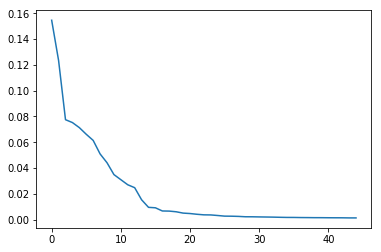

19

In [6]:
plt.plot(pca_temp_data.explained_variance_ratio_)
plt.show()
key_comps = pca_temp_data.explained_variance_ratio_
key_comps = np.round(key_comps,3)
count_data = 0
for i in key_comps:
    if i > .005:
        count_data = count_data + 1
count_data

### Establishing evaluation baseline for classification models

### Establishing evaluation baseline for regression models

In [7]:
pca_data = decomposition.PCA(n_components = 35)
pca_data.fit(X_data_train)
X_data_decomp_train_pca = pca_data.transform(X_data_train)
X_data_decomp_test_pca = pca_data.transform(X_data_test)


In [8]:
from sklearn import tree
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

dt_selc = tree.DecisionTreeClassifier()
dt_pca = tree.DecisionTreeClassifier()

# This section is commented because it was used for GridSearch. Once we got the best parameters, we used those parameters in the classifier defination

#param_grid = {"criterion": ["gini", "entropy"], 
#            "min_samples_split": [2,10,20],
#            "max_depth": [None, 2,5,10],
#            "min_samples_leaf": [1,5,10],
#            "max_leaf_nodes": [None, 5,10,20]
#            }

# grid_search_selc = GridSearchCV(dt_selc, param_grid = param_grid, cv = 3, n_jobs = 4)
# grid_search_selc = grid_search_selc.fit(X_data_decomp_train_selc, Y_data_train)
# grid_search_pca = GridSearchCV(dt_pca, param_grid = param_grid, cv = 3, n_jobs = 4)
# grid_search_pca = grid_search_pca.fit(X_data_decomp_train_pca, Y_data_train)

# print(grid_search_pca.best_estimator_, grid_search_pca.best_score_)

# grid_search_selc = GridSearchCV(dt_selc, param_grid = param_grid, cv = 3, n_jobs = 4)
# grid_search_selc = grid_search_selc.fit(X_est_train_selc, Y_est_train)
# grid_search_pca = GridSearchCV(dt_pca, param_grid = param_grid, cv = 3, n_jobs = 4)
# grid_search_pca = grid_search_pca.fit(X_est_train_pca, Y_est_train)

# grid_search_selc.best_estimator_, grid_search_selc.best_score_, grid_search_pca.best_estimator_, grid_search_pca.best_score_

In [9]:
from sklearn import tree
dt_selc = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')

dt_selc.fit(X_data_decomp_train_selc, Y_data_train)

dt_pca = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

dt_pca.fit(X_data_decomp_train_pca, Y_data_train)

importances_selc = dt_selc.feature_importances_
importances_pca = dt_pca.feature_importances_

C:\Users\Jayesh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [10]:
indices_selc = np.argsort(importances_selc)[::-1]
indices_pca = np.argsort(importances_pca)[::-1]

In [11]:
xaxis = data.columns
new_axis_selc=[]
new_axis_pca=[]
for item in indices_selc:
    new_axis_selc.append(xaxis[item])
for item in indices_pca:
    new_axis_pca.append(xaxis[item])

In [12]:
importances_selc=-np.sort(-importances_selc)
importances_pca=-np.sort(-importances_pca)

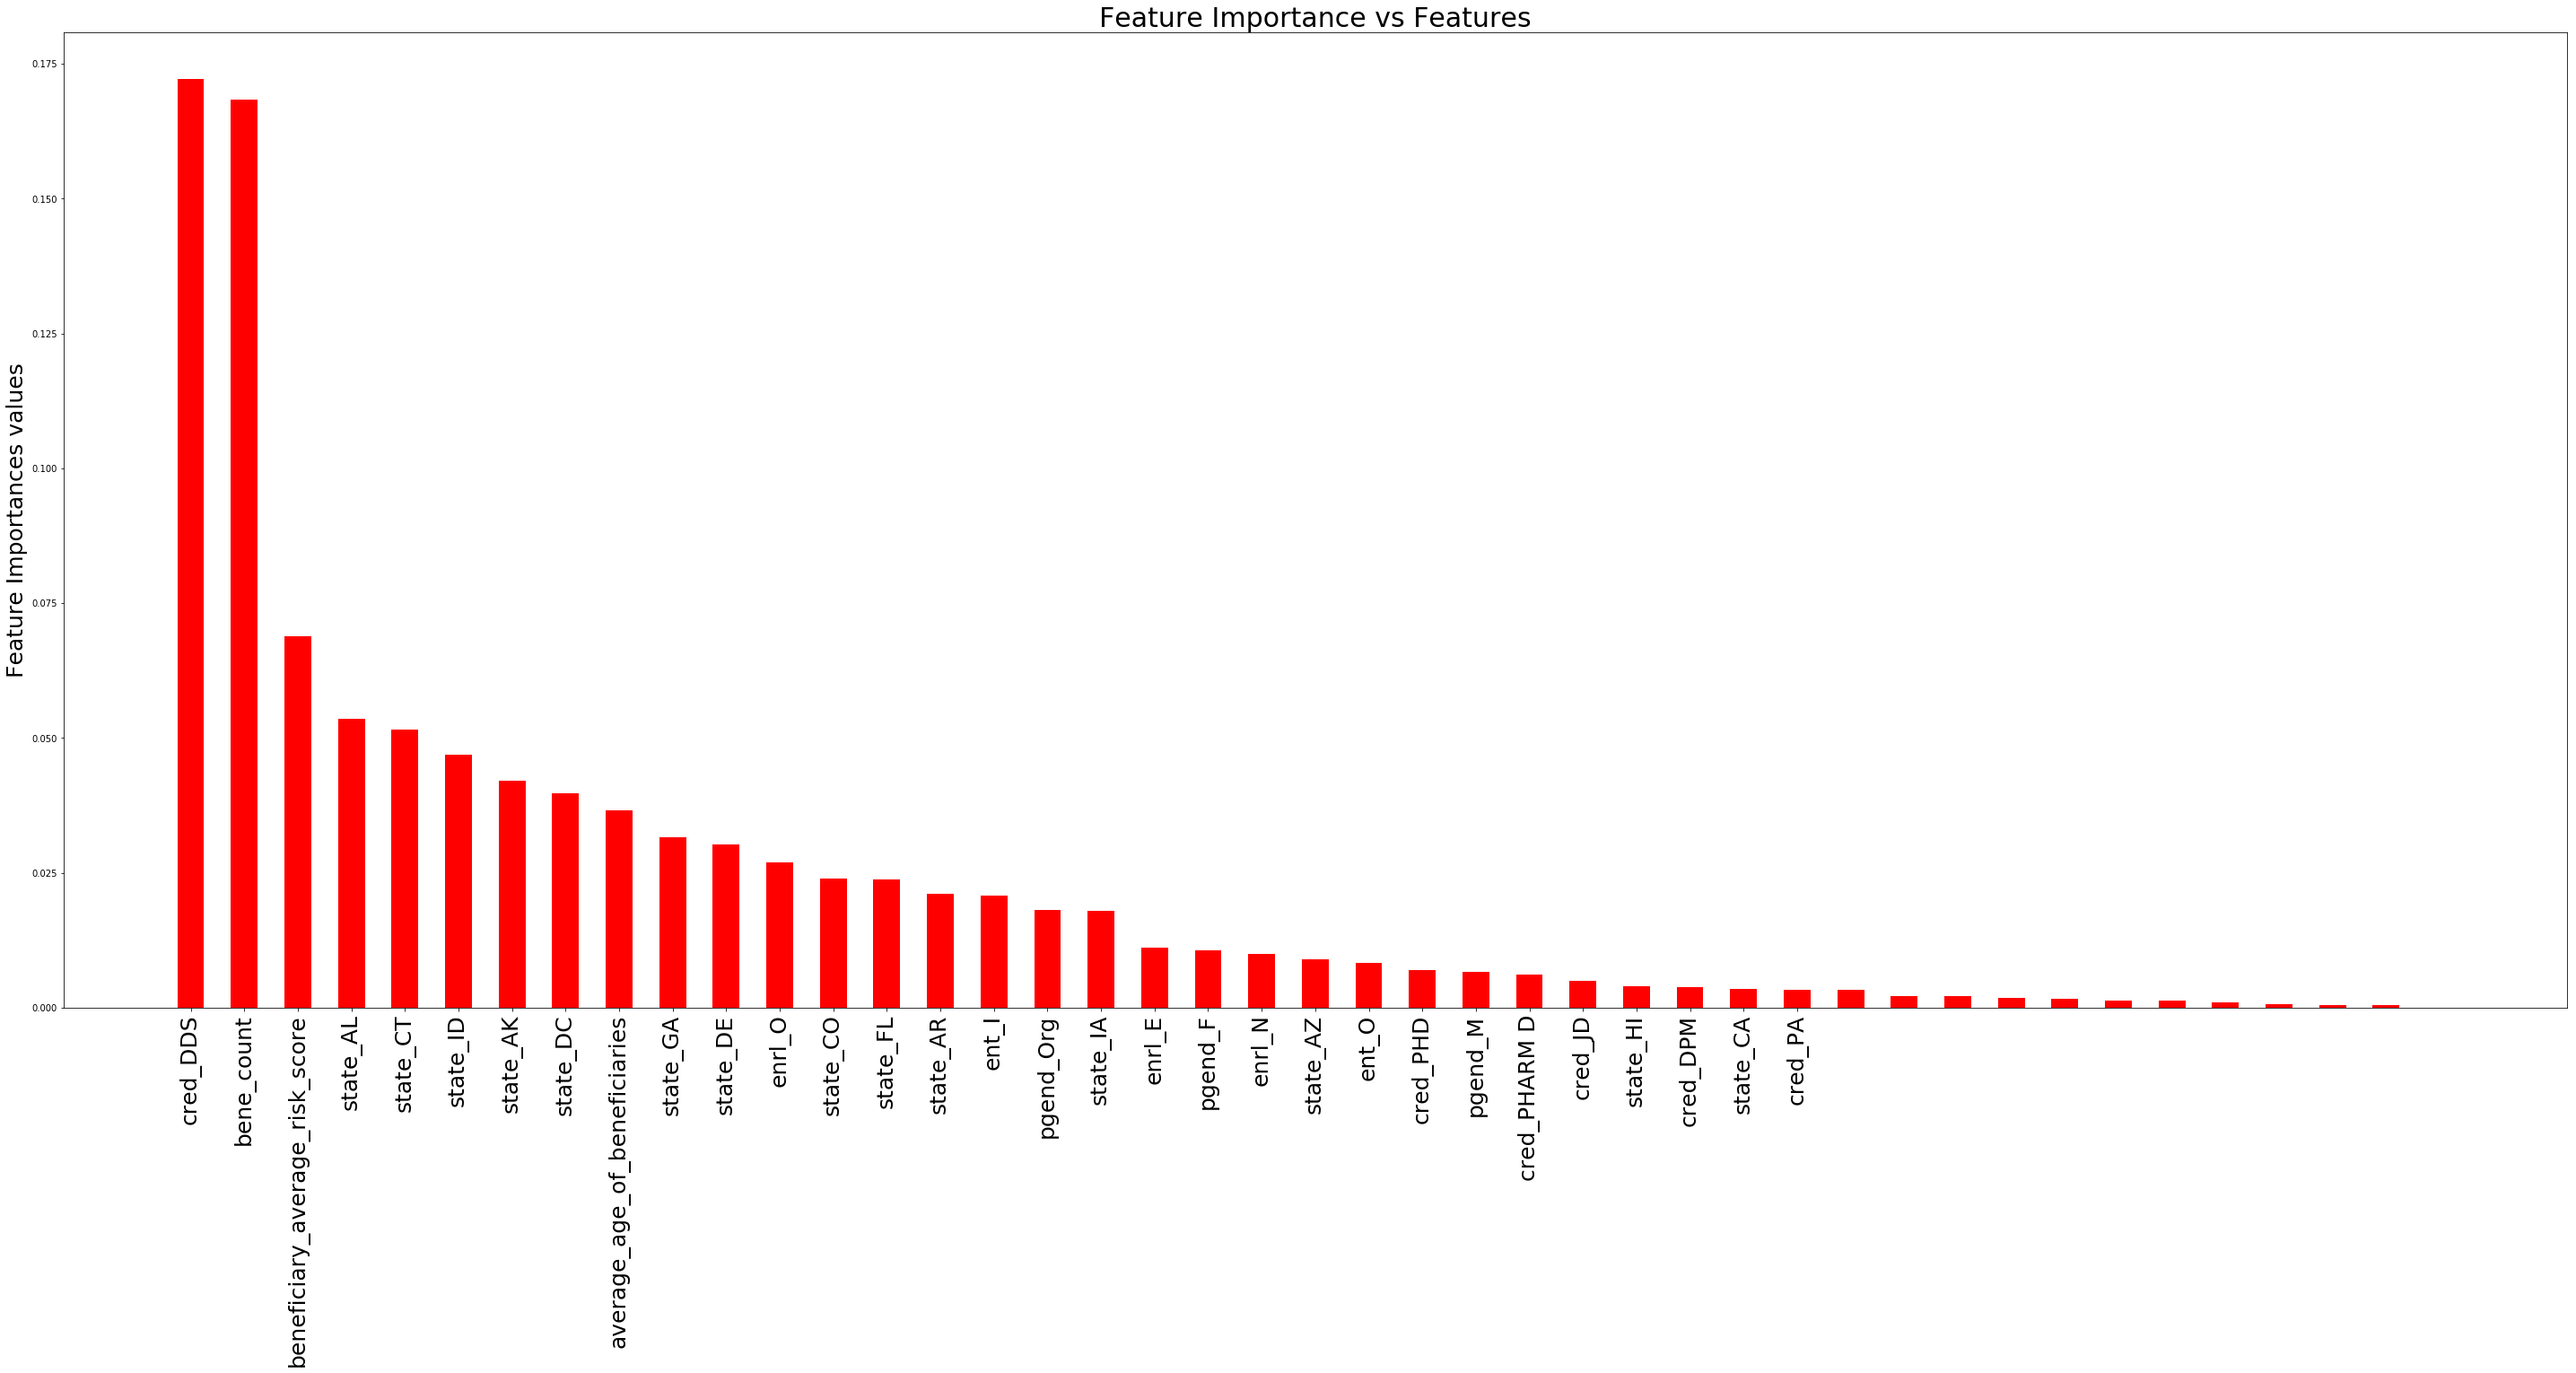

In [13]:
plt.figure(figsize=(50,20))
plt.title("Feature Importance vs Features",fontsize=30)
plt.bar(range(X_data_decomp_train_selc.shape[1]), importances_selc, color="r", align="center",width=0.5)
plt.xticks(range(31),new_axis_selc[0:31],rotation='vertical',fontsize=25)
plt.ylabel("Feature Importances values",fontsize=25)
plt.show()

### The above graph lets us understand the most important features. But we still have to find out the correlation to understand whether these features are positively or negatively affecting the target class

In [14]:
data['brand_ratio']=data_brand_ratio
correlationDT=data[['cred_APRN','bene_count','state_AK','state_CO','state_IA','cred_PT','enrl_O','enrl_N','beneficiary_average_risk_score','brand_ratio']].corr()
data = data.drop('brand_ratio', axis = 1)
correlationDT

,cred_APRN,bene_count,state_AK,state_CO,state_IA,cred_PT,enrl_O,enrl_N,beneficiary_average_risk_score,brand_ratio
cred_APRN,1.000000,-0.048590,0.010033,-0.004075,0.008461,-0.006858,-0.016693,-0.028560,0.038847,-0.001162
bene_count,-0.048590,1.000000,-0.023416,-0.028980,0.008738,-0.014036,-0.037674,-0.313880,-0.020950,0.035340
state_AK,0.010033,-0.023416,1.000000,-0.005870,-0.004552,-0.000998,0.001325,0.000166,-0.005936,0.003700
state_CO,-0.004075,-0.028980,-0.005870,1.000000,-0.012845,-0.001470,0.002414,0.002077,-0.017216,0.007556
state_IA,0.008461,0.008738,-0.004552,-0.012845,1.000000,-0.002183,-0.002032,-0.016035,-0.028777,-0.007422
cred_PT,-0.006858,-0.014036,-0.000998,-0.001470,-0.002183,1.000000,-0.001447,0.011631,-0.000930,0.005194
enrl_O,-0.016693,-0.037674,0.001325,0.002414,-0.002032,-0.001447,1.000000,-0.033928,-0.039889,-0.004212
enrl_N,-0.028560,-0.313880,0.000166,0.002077,-0.016035,0.011631,-0.033928,1.000000,-0.053083,-0.193955
beneficiary_average_risk_score,0.038847,-0.020950,-0.005936,-0.017216,-0.028777,-0.000930,-0.039889,-0.053083,1.000000,0.014732
brand_ratio,-0.001162,0.035340,0.003700,0.007556,-0.007422,0.005194,-0.004212,-0.193955,0.014732,1.000000


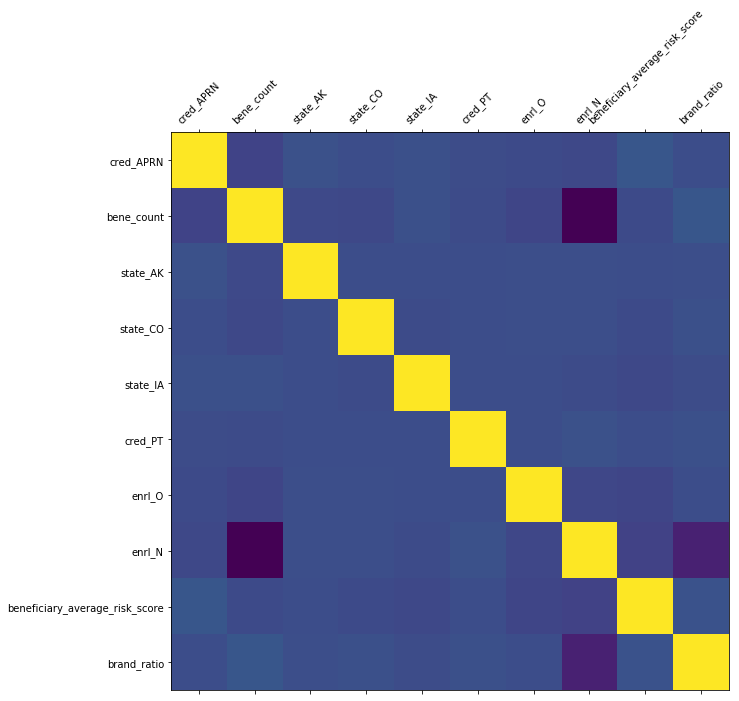

In [15]:
fig, ax = plt.subplots(figsize=(10,20))
ax.matshow(correlationDT)
plt.xticks(range(len(correlationDT.columns)), correlationDT.columns,rotation=45,fontsize=10);
plt.yticks(range(len(correlationDT.columns)), correlationDT.columns,fontsize=10);
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
prediction_train_df_selc = dt_selc.predict(X_data_decomp_train_selc)
prediction_train_df_pca = dt_pca.predict(X_data_decomp_train_pca)
accuracyTrain_selc = accuracy_score(prediction_train_df_selc,Y_data_train)
accuracyTrain_pca = accuracy_score(prediction_train_df_pca, Y_data_train)
print("Accuracy from the training data set (SELC) prediction is",accuracyTrain_selc*100,"%")
print("Accuracy from the training data set (PCA) prediction is",accuracyTrain_pca*100,"%")

Accuracy from the training data set (SELC) prediction is 71.0775595854 %
Accuracy from the training data set (PCA) prediction is 73.6864428851 %


In [17]:
prediction_test_df_selc = dt_selc.predict(X_data_decomp_test_selc)
prediction_test_df_pca = dt_pca.predict(X_data_decomp_test_pca)
accuracyTest_selc = accuracy_score(prediction_test_df_selc,Y_data_test)
accuracyTest_pca = accuracy_score(prediction_test_df_pca,Y_data_test)
print("Accuracy from the test data set prediction (SELC) is",accuracyTest_selc *100,"%")
print("Accuracy from the test data set prediction (PCA) is",accuracyTest_pca*100,"%")

Accuracy from the test data set prediction (SELC) is 53.3767895943 %
Accuracy from the test data set prediction (PCA) is 51.0283656279 %


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# forest_selc = RandomForestClassifier()

# grid_search_selc = GridSearchCV(forest_selc, param_grid = param_grid, cv = 3, n_jobs = 4)
# grid_search_selc = grid_search_selc.fit(X_data_decomp_train_selc, Y_data_train)
# grid_search_selc.best_estimator_, grid_search_selc.best_score_

# forest_pca = RandomForestClassifier()

# grid_search_pca = GridSearchCV(forest_pca, param_grid = param_grid, cv = 3, n_jobs = 4)
# grid_search_pca = grid_search_pca.fit(X_data_decomp_train_pca, Y_data_train)
# grid_search_pca.best_estimator_, grid_search_pca.best_score_

In [19]:
forest_selc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)

forest_pca = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=20,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)

In [20]:
forest_pca.fit(X_data_decomp_train_pca, Y_data_train)
forest_selc.fit(X_data_decomp_train_selc, Y_data_train)

Forest_importances_pca = forest_pca.feature_importances_
Forest_importances_selc = forest_selc.feature_importances_

Forest_indices_selc = np.argsort(Forest_importances_selc)[::-1]
Forest_indices_pca = np.argsort(Forest_importances_pca)[::-1]

# Forest_indices_selc=-np.sort(-Forest_importances_selc)
# Forest_indices_pca =-np.sort(-Forest_importances_pca)

Fxaxis = data.columns
Forest_new_axis_selc=[]
Forest_new_axis_pca=[]

for item in Forest_indices_selc :
    Forest_new_axis_selc.append(Fxaxis[item])
    
for item in Forest_indices_pca:
    Forest_new_axis_pca.append(Fxaxis[item])


In [21]:
Forest_importances_pca=-np.sort(-Forest_importances_pca)
Forest_importances_selc =-np.sort(-Forest_importances_selc )

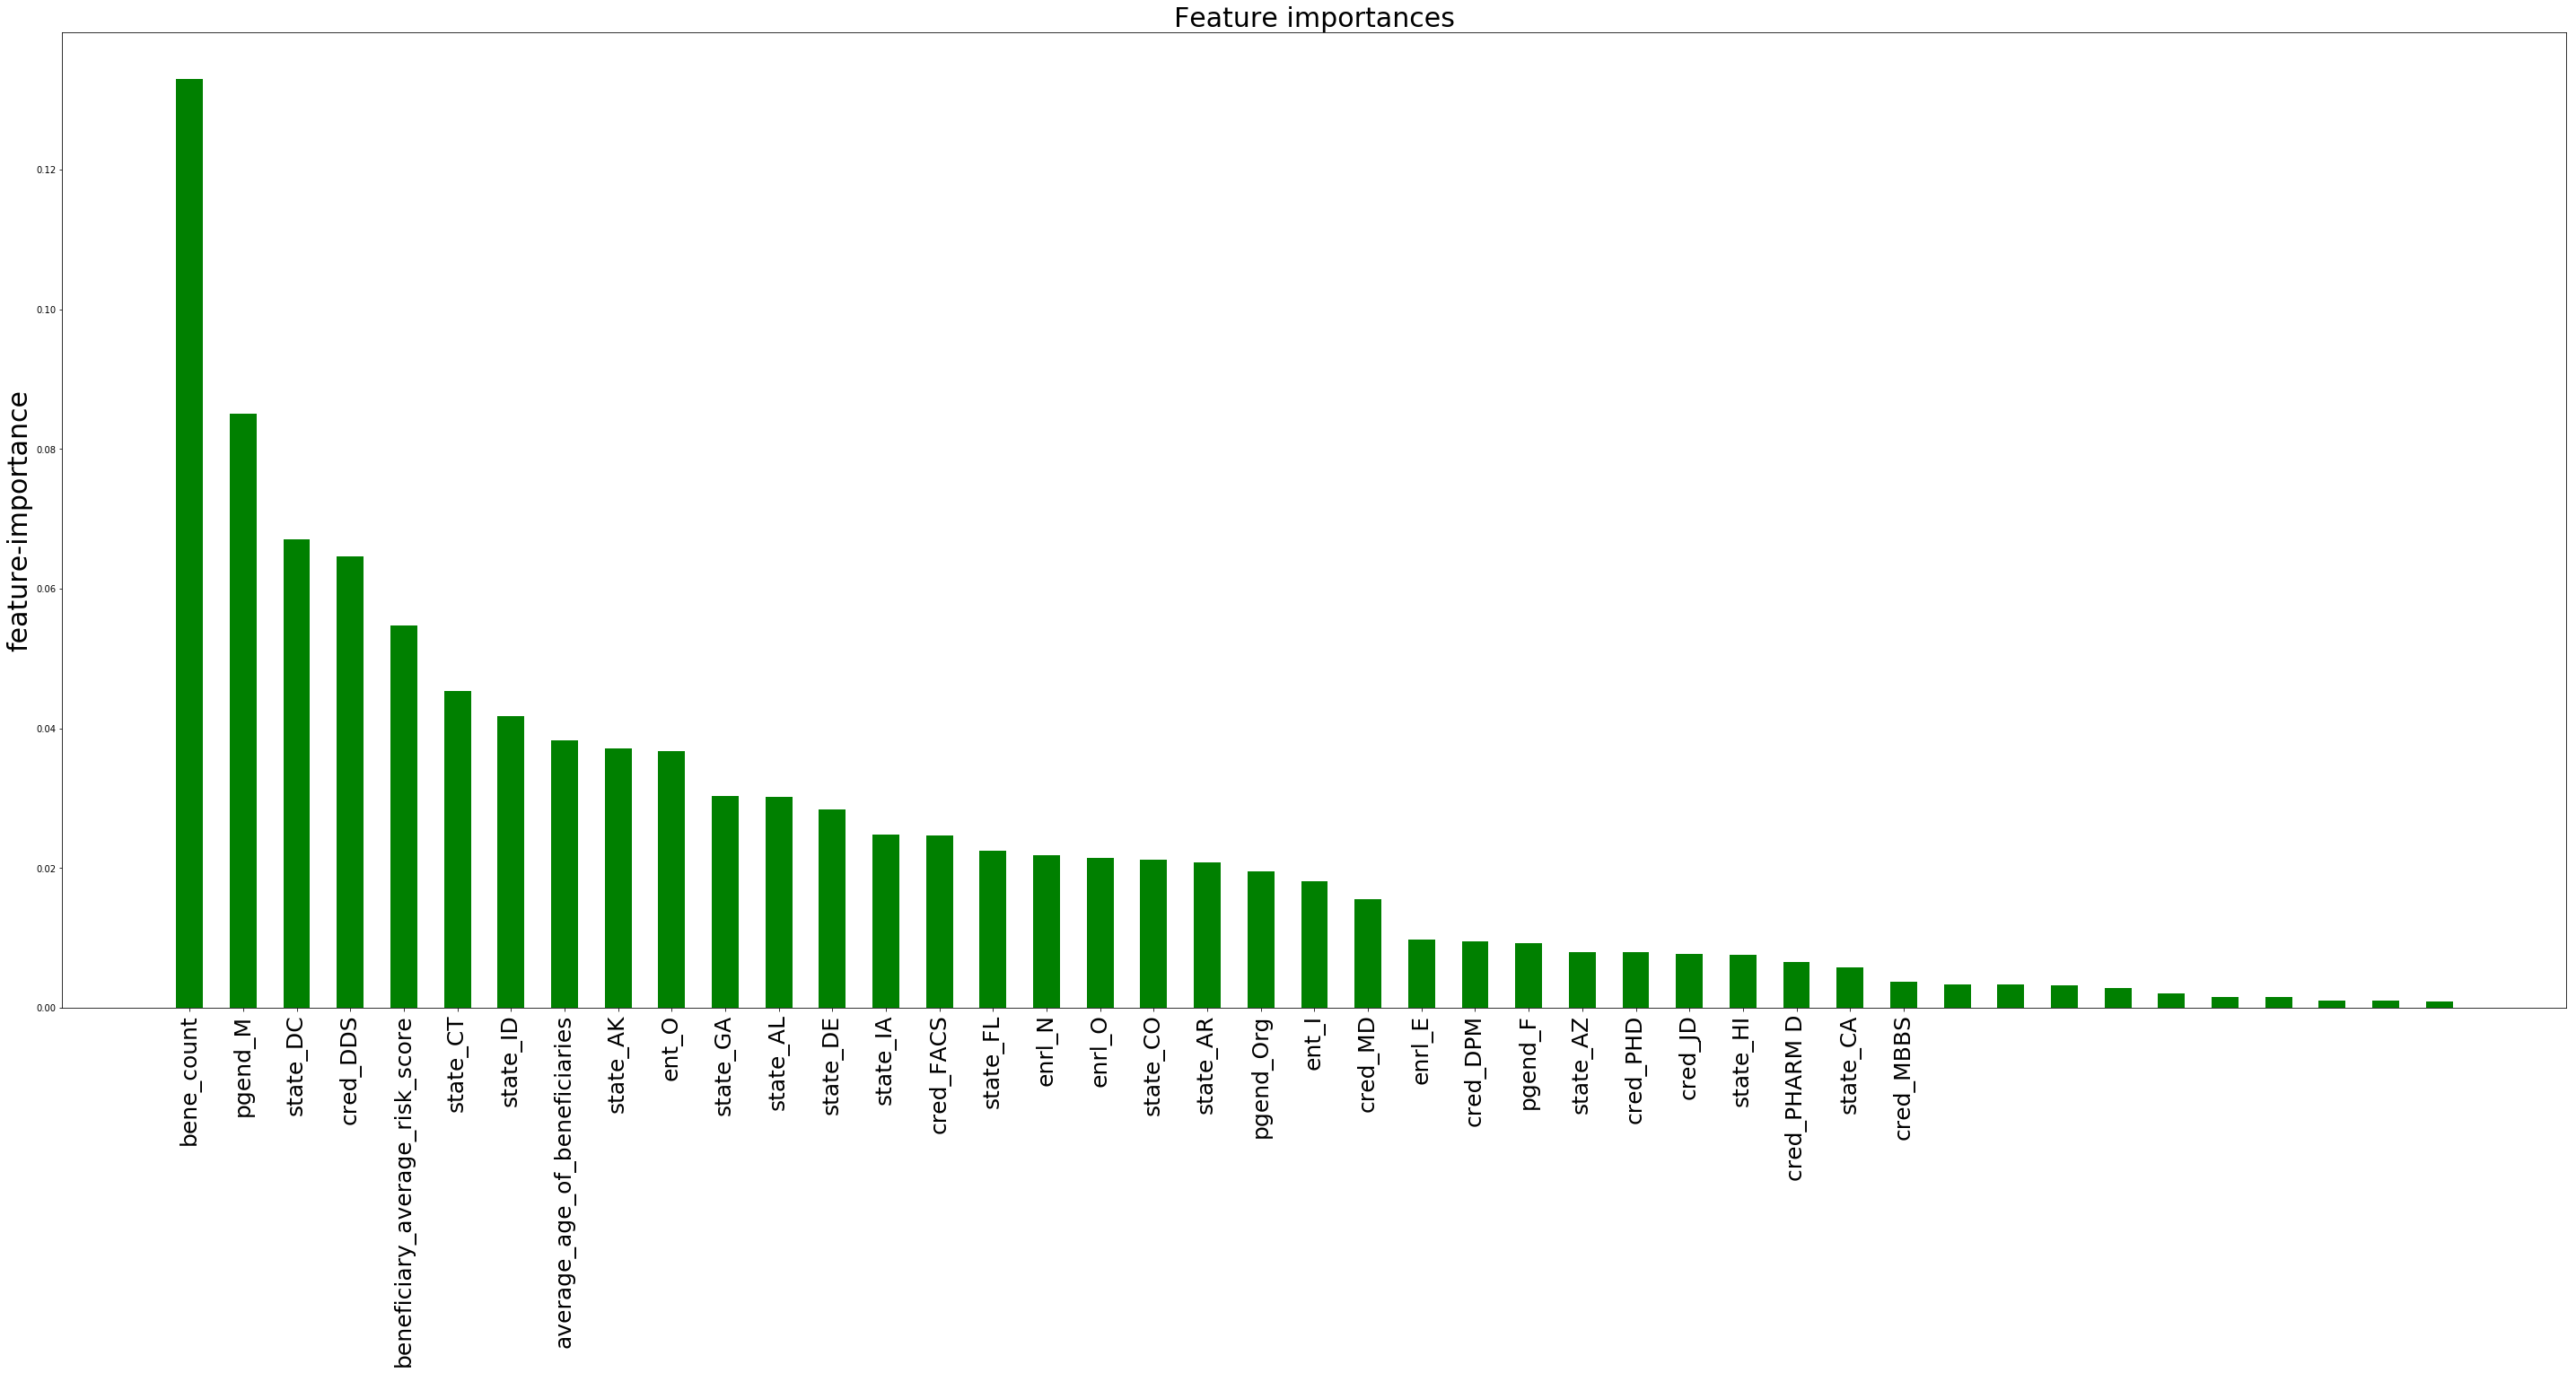

In [22]:
#Plot the feature importances of the forest
plt.figure(figsize=(50,20))
plt.title("Feature importances",fontsize=30)
plt.bar(range(X_data_decomp_train_selc.shape[1]), Forest_importances_selc, color="g", align="center",width=0.5)
plt.xticks(range(len(Forest_importances_selc)-10),Forest_new_axis_selc[0:len(Forest_importances_selc)-10],rotation='vertical',fontsize=25)
plt.ylabel("feature-importance",fontsize=30)
plt.show()

In [23]:
data['brand_ratio']=data_brand_ratio
correlation=data[['cred_APRN','bene_count','cred_PT','state_CA','state_AZ','pgend_Org','state_GA','beneficiary_average_risk_score','brand_ratio']].corr()
data = data.drop('brand_ratio', axis = 1)
print(correlation)

                                cred_APRN  bene_count   cred_PT  state_CA  \
cred_APRN                        1.000000   -0.048590 -0.006858 -0.044133   
bene_count                      -0.048590    1.000000 -0.014036 -0.007869   
cred_PT                         -0.006858   -0.014036  1.000000  0.000457   
state_CA                        -0.044133   -0.007869  0.000457  1.000000   
state_AZ                         0.010497    0.003865  0.000599 -0.048727   
pgend_Org                       -0.018607   -0.044129 -0.001298  0.026563   
state_GA                        -0.011863    0.019445  0.001609 -0.053881   
beneficiary_average_risk_score   0.038847   -0.020950 -0.000930  0.010350   
brand_ratio                     -0.001162    0.035340  0.005194 -0.007183   

                                state_AZ  pgend_Org  state_GA  \
cred_APRN                       0.010497  -0.018607 -0.011863   
bene_count                      0.003865  -0.044129  0.019445   
cred_PT                         0.

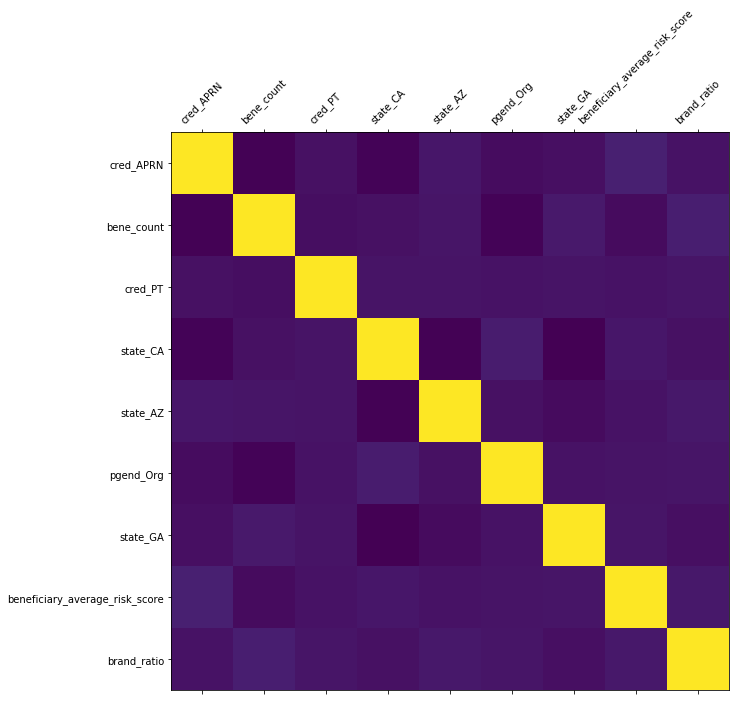

In [24]:
fig, ax = plt.subplots(figsize=(10,20))
ax.matshow(correlation)
plt.xticks(range(len(correlation.columns)), correlation.columns,rotation=45,fontsize=10);
plt.yticks(range(len(correlation.columns)), correlation.columns,fontsize=10);
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
Forest_prediction_train_df_selc = forest_selc.predict(X_data_decomp_train_selc)
Forest_prediction_test_df_pca = forest_pca.predict(X_data_decomp_test_pca)
FaccuracyTrain_selc = accuracy_score(prediction_train_df_selc,Y_data_train)
FaccuracyTrain_pca = accuracy_score(prediction_train_df_pca,Y_data_train)
print("Accuracy from the training data set prediction (SELC) is",FaccuracyTrain_selc *100,"%")
print("Accuracy from the training data set prediction (PCA) is",FaccuracyTrain_pca*100,"%")


Accuracy from the training data set prediction (SELC) is 71.0775595854 %
Accuracy from the training data set prediction (PCA) is 73.6864428851 %


In [26]:
Forest_prediction_test_df_selc = forest_selc.predict(X_data_decomp_test_selc)
Forest_prediction_test_df_pca = forest_pca.predict(X_data_decomp_test_pca)
FaccuracyTest_selc = accuracy_score(prediction_test_df_selc,Y_data_test)
FaccuracyTest_pca = accuracy_score(prediction_test_df_pca,Y_data_test)
print("Accuracy from the test data set prediction (SELC) is",FaccuracyTest_selc *100,"%")
print("Accuracy from the test data set prediction (PCA) is",FaccuracyTest_pca*100,"%")

Accuracy from the test data set prediction (SELC) is 53.3767895943 %
Accuracy from the test data set prediction (PCA) is 51.0283656279 %


### Adaboost Classification

In [27]:
from sklearn.ensemble import AdaBoostClassifier

dt_selc = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=0.8, n_estimators=500, random_state=None)

dt_pca = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=0.8, n_estimators=200, random_state=None)

dt_selc.fit(X_data_decomp_train_selc, Y_data_train)
dt_pca.fit(X_data_decomp_train_pca, Y_data_train)

importances_selc = dt_selc.feature_importances_
importances_pca = dt_pca.feature_importances_

In [28]:
indices_selc = np.argsort(importances_selc)[::-1]
indices_pca = np.argsort(importances_pca)[::-1]

In [29]:
xaxis = data.columns
new_axis_selc=[]
new_axis_pca=[]
for item in indices_selc:
    new_axis_selc.append(xaxis[item])
for item in indices_pca:
    new_axis_pca.append(xaxis[item])

In [30]:
importances_selc=-np.sort(-importances_selc)
importances_pca=-np.sort(-importances_pca)

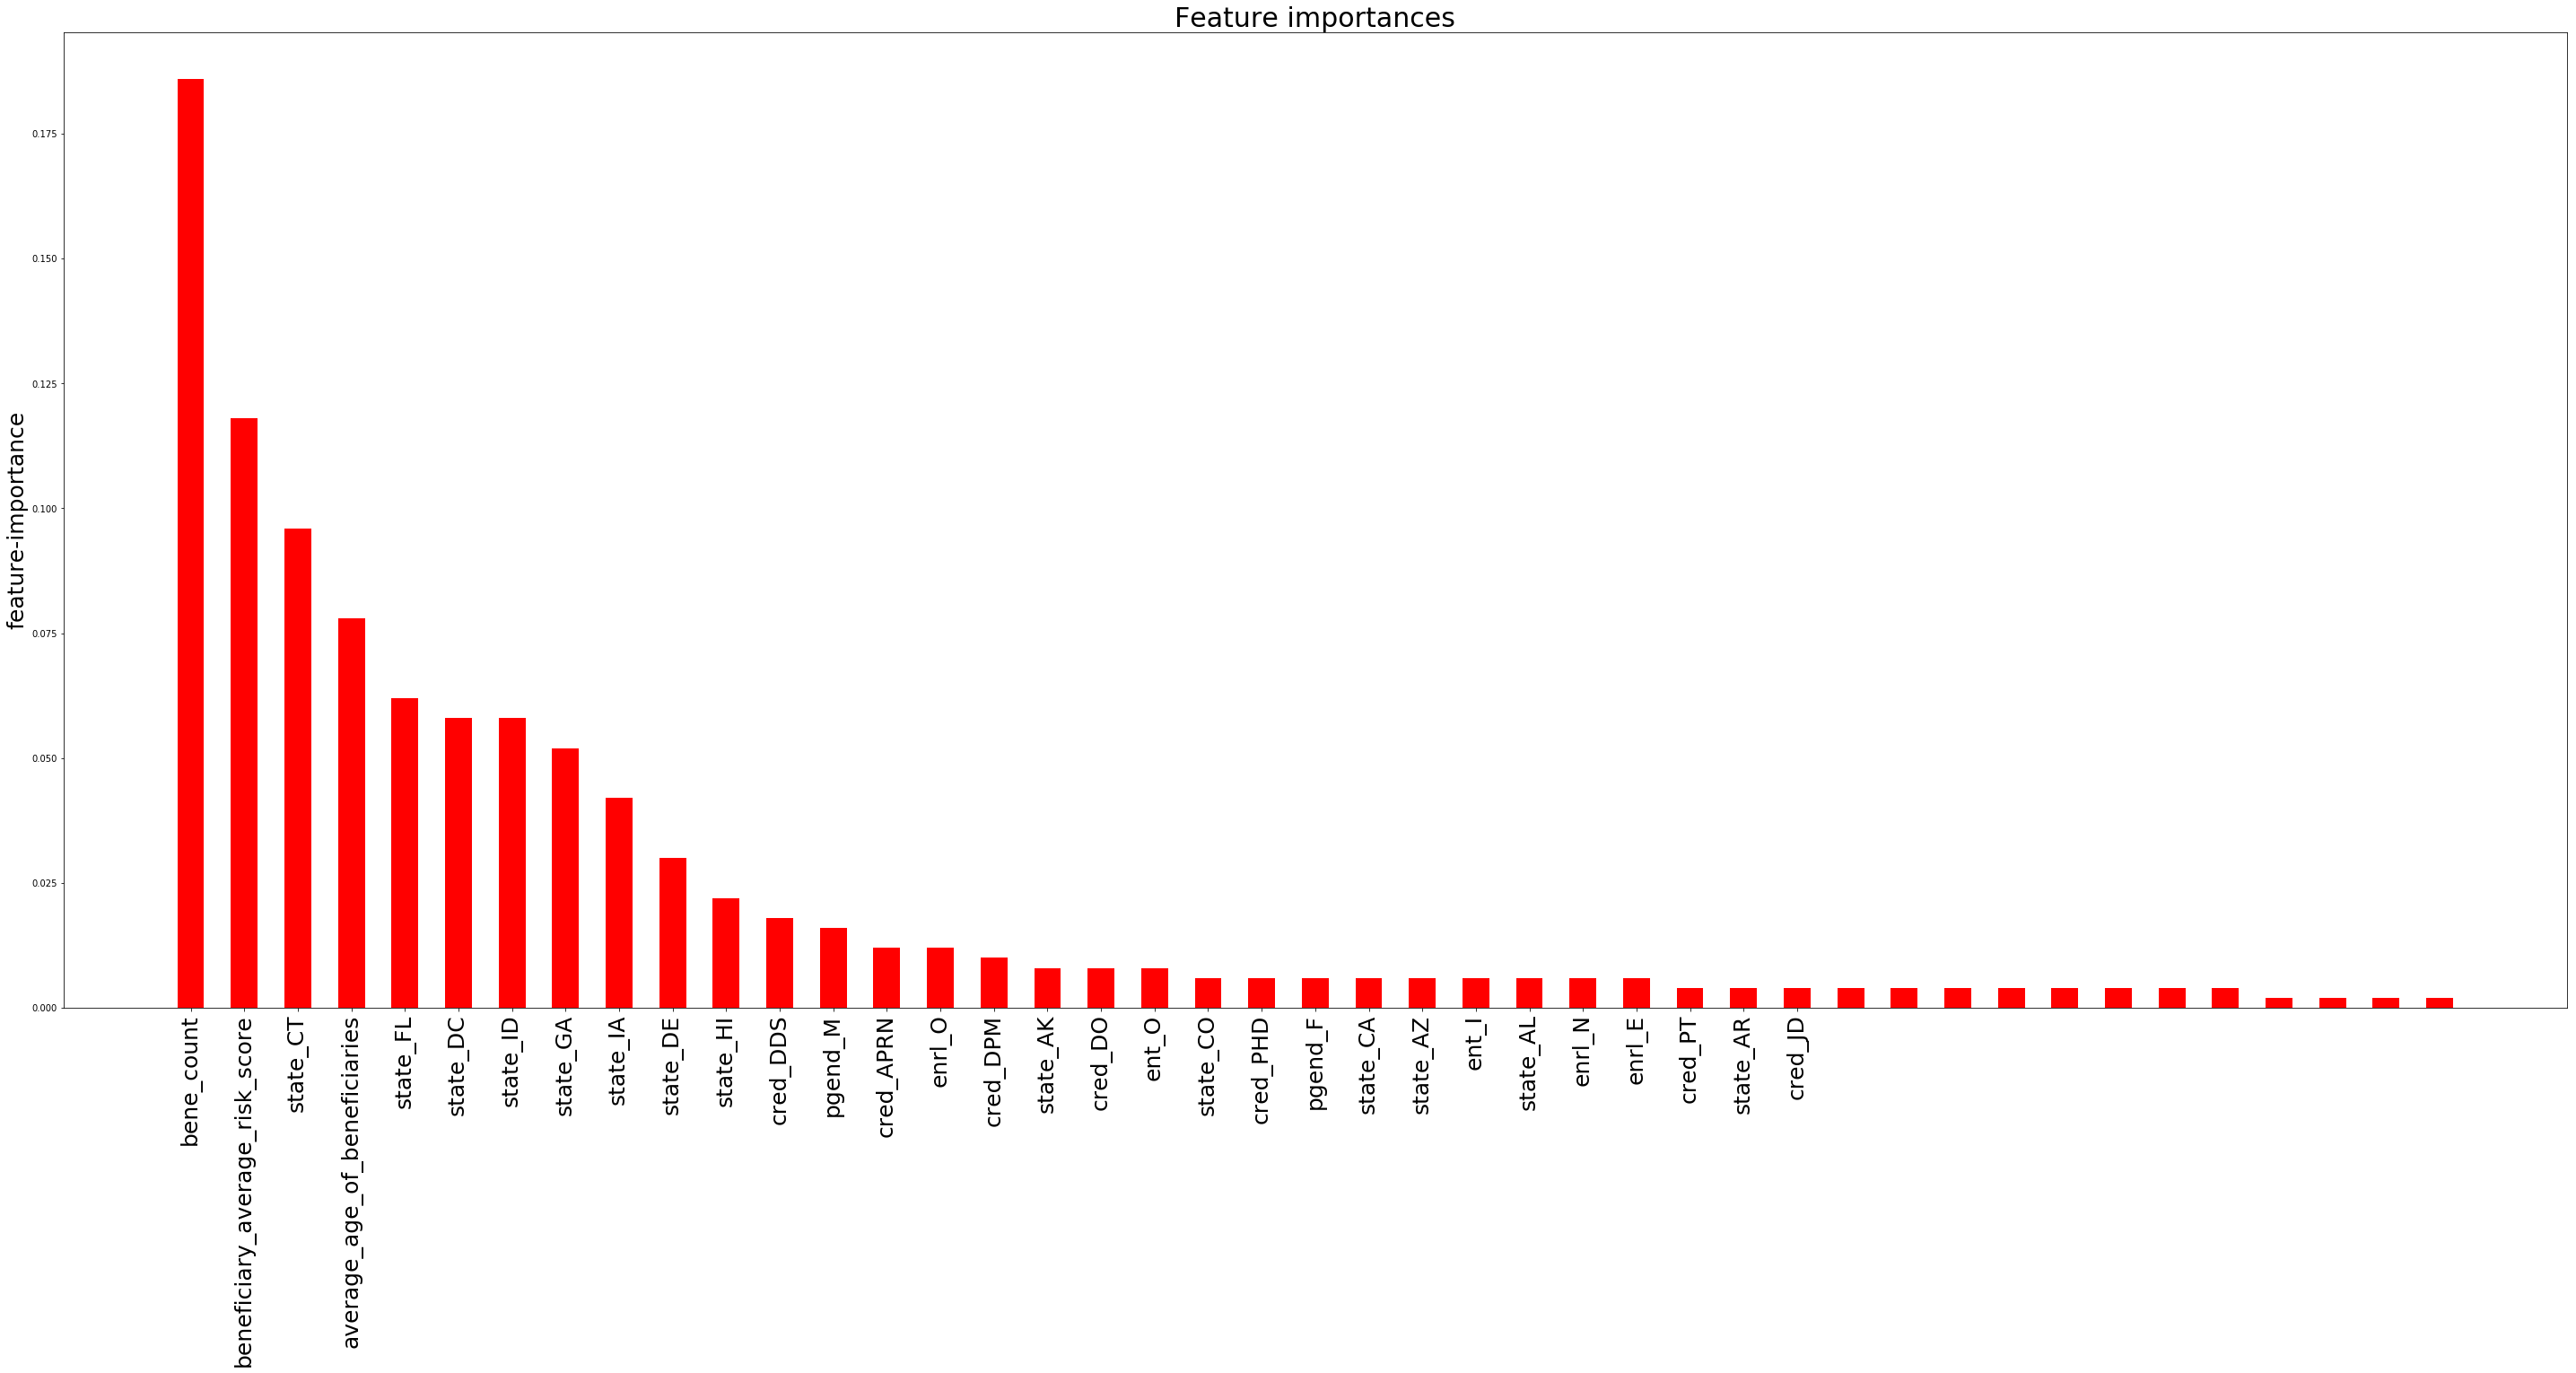

In [31]:
plt.figure(figsize=(50,20))
plt.title("Feature importances",fontsize=30)
plt.bar(range(X_data_decomp_train_selc.shape[1]), importances_selc, color="r", align="center",width=0.5)
plt.xticks(range(31),new_axis_selc[0:31],rotation='vertical',fontsize=25)
plt.ylabel("feature-importance",fontsize=25)
plt.show()

In [32]:
data['brand_ratio']=data_brand_ratio
correlation=data[['cred_APRN','bene_count','cred_PT','state_CA','state_AZ','pgend_Org','state_GA','beneficiary_average_risk_score','brand_ratio']].corr()
data = data.drop('brand_ratio', axis = 1)
print(correlation)

                                cred_APRN  bene_count   cred_PT  state_CA  \
cred_APRN                        1.000000   -0.048590 -0.006858 -0.044133   
bene_count                      -0.048590    1.000000 -0.014036 -0.007869   
cred_PT                         -0.006858   -0.014036  1.000000  0.000457   
state_CA                        -0.044133   -0.007869  0.000457  1.000000   
state_AZ                         0.010497    0.003865  0.000599 -0.048727   
pgend_Org                       -0.018607   -0.044129 -0.001298  0.026563   
state_GA                        -0.011863    0.019445  0.001609 -0.053881   
beneficiary_average_risk_score   0.038847   -0.020950 -0.000930  0.010350   
brand_ratio                     -0.001162    0.035340  0.005194 -0.007183   

                                state_AZ  pgend_Org  state_GA  \
cred_APRN                       0.010497  -0.018607 -0.011863   
bene_count                      0.003865  -0.044129  0.019445   
cred_PT                         0.

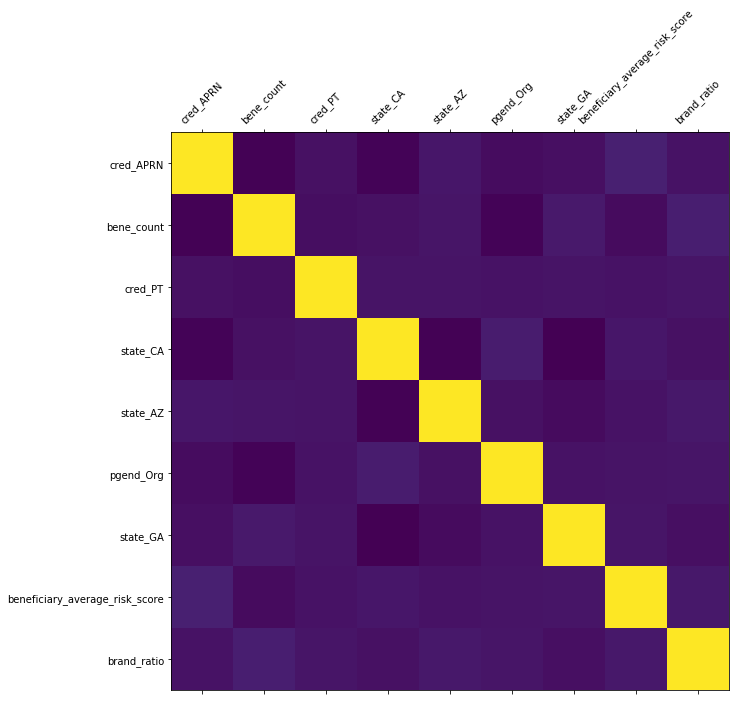

In [33]:
fig, ax = plt.subplots(figsize=(10,20))
ax.matshow(correlation)
plt.xticks(range(len(correlation.columns)), correlation.columns,rotation=45,fontsize=10);
plt.yticks(range(len(correlation.columns)), correlation.columns,fontsize=10);
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
prediction_train_df_selc = dt_selc.predict(X_data_decomp_train_selc)
prediction_train_df_pca = dt_pca.predict(X_data_decomp_train_pca)
prediction_test_df_selc = dt_selc.predict(X_data_decomp_test_selc)
prediction_test_df_pca = dt_pca.predict(X_data_decomp_test_pca)
accuracyTrain_selc = accuracy_score(prediction_train_df_selc,Y_data_train)
accuracyTrain_pca = accuracy_score(prediction_train_df_pca, Y_data_train)
print("Accuracy from the training data set prediction is",accuracyTrain_selc*100,"%")
print("Accuracy from the training data set prediction is",accuracyTrain_pca*100,"%")

Accuracy from the training data set prediction is 55.4753559992 %
Accuracy from the training data set prediction is 52.3981734344 %


In [35]:
prediction_test_df_selc = dt_selc.predict(X_data_decomp_test_selc)
prediction_test_df_pca = dt_pca.predict(X_data_decomp_test_pca)
accuracyTest_selc = accuracy_score(prediction_test_df_selc,Y_data_test)
accuracyTest_pca = accuracy_score(prediction_test_df_pca,Y_data_test)
print("Accuracy from the test data set prediction (SELC) is",accuracyTest_selc *100,"%")
print("Accuracy from the test data set prediction (PCA) is",accuracyTest_pca*100,"%")

Accuracy from the test data set prediction (SELC) is 55.3620859005 %
Accuracy from the test data set prediction (PCA) is 52.3484239664 %


### Logistic Regression

In [36]:
from sklearn import tree
from sklearn import datasets, linear_model
from sklearn import tree

dt_selc = linear_model.LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=True)
dt_selc.fit(X_data_decomp_train_selc, Y_data_train)

dt_pca =  linear_model.LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=True)

dt_pca.fit(X_data_decomp_train_pca, Y_data_train)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=True)

In [37]:
from sklearn.metrics import accuracy_score
prediction_train_df_selc = dt_selc.predict(X_data_decomp_train_selc)
prediction_train_df_pca = dt_pca.predict(X_data_decomp_train_pca)
prediction_test_df_selc = dt_selc.predict(X_data_decomp_test_selc)
prediction_test_df_pca = dt_pca.predict(X_data_decomp_test_pca)

accuracyTrain_selc = accuracy_score(prediction_train_df_selc,Y_data_train)
accuracyTrain_pca = accuracy_score(prediction_train_df_pca, Y_data_train)
print("Accuracy for LogReg from the training data(selc) set prediction is",accuracyTrain_selc*100,"%")
print("Accuracy for LogReg from the training data(pca) set prediction is",accuracyTrain_pca*100,"%")



Accuracy for LogReg from the training data(selc) set prediction is 53.4188574788 %
Accuracy for LogReg from the training data(pca) set prediction is 50.8786812216 %


In [38]:
accuracyTest_selc = accuracy_score(prediction_test_df_selc,Y_data_test)
accuracyTest_pca = accuracy_score(prediction_test_df_pca, Y_data_test)
print("Accuracy for LogReg from the testing data (selc) set prediction is",accuracyTest_selc*100,"%")
print("Accuracy for LogReg from the testing data (pca) set prediction is",accuracyTest_pca*100,"%")

Accuracy for LogReg from the testing data (selc) set prediction is 53.4712920796 %
Accuracy for LogReg from the testing data (pca) set prediction is 50.9085632646 %
